In [34]:
! pip install spacy
!python -m spacy download en_core_web_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2023-05-17 17:01:35.426165: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 58.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [35]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import string
#import spacy
from matplotlib.pyplot import imread
#from wordcloud import WordCloud


In [36]:
df=pd.read_csv('Elon_musk.csv',encoding='cp1252')

In [37]:
df.drop(['Unnamed: 0'], inplace= True, axis= 1)
df

,Text
0,@kunalb11 I’m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [38]:
df=[Text.strip() for Text in df.Text]

In [39]:
df[0:10]

['@kunalb11 I’m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [40]:

df1=','.join(df)
df1

'@kunalb11 I’m an alien,@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?,@joerogan @Spotify Great interview!,@gtera27 Doge is underestimated,@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.,The most entertaining outcome is the most likely,@GiveDirectly Just sent some,Just agree to do Clubhouse with @kanyewest,https://t.co/3rWE9uHSTS,@geoffkeighley @UnrealEngine It’s getting real,Bought some Dogecoin for lil X, so he can be a toddler hodler,@JoshManMode He definitely has issues, but the sentencing seems a bit high,@freewalletorg Thanks for fixing,@freewalletorg Please unlock my account,@AstroJordy <U+0001F923><U+0001F

In [41]:
no_punc_text=df1.translate(str.maketrans('','',string.punctuation))
no_punc_text

'kunalb11 I’m an alienIDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried itjoerogan Spotify Great interviewgtera27 Doge is underestimatedteslacn Congratulations Tesla China for amazing execution last year Now on to the next for even moreHappy New Year of the Ox httpstco9WFKMYu2ojFrodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrMOwenSparks flcnhvy anonyx10 Haha thanks flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocationThe most entertaining outcome is the most likelyGiveDirectly Just sent someJust agree to do Clubhouse with kanyewesthttpstco3rWE9uHSTSgeoffkeighley UnrealEngine It’s getting realBought some Dogecoin for lil X so he can be a toddler hodlerJoshManMode He definitely has issues but the sentencing seems a bit highfreewalletorg Thanks for fixingfreewalletorg Please unlock my accountAstroJordy U0001F923U0001F923This is true power haha httpstcoFc9uhQSd7Ofreewalletorg Any crypto wallet t

In [42]:
#tokenisation
!pip install nltk
import nltk
nltk.download('punkt')
from nltk import sent_tokenize


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [43]:
from nltk.tokenize import word_tokenize
text_tokenize=word_tokenize(no_punc_text)
print(text_tokenize[0:50])

['kunalb11', 'I', '’', 'm', 'an', 'alienIDAACarmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'itjoerogan', 'Spotify', 'Great', 'interviewgtera27', 'Doge', 'is', 'underestimatedteslacn', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'moreHappy', 'New', 'Year', 'of', 'the', 'Ox', 'httpstco9WFKMYu2ojFrodo', 'was', 'the', 'underdoge', 'All']


In [44]:
len(text_tokenize)

19810

In [45]:
#remove stopwords
import nltk 
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [46]:

my_stop_words=stopwords.words('english')
#my_stop_words.append('the')
no_stop_tokens=[word for word in text_tokenize if not  word in my_stop_words]
print(no_stop_tokens[0:40])

['kunalb11', 'I', '’', 'alienIDAACarmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'itjoerogan', 'Spotify', 'Great', 'interviewgtera27', 'Doge', 'underestimatedteslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'moreHappy', 'New', 'Year', 'Ox', 'httpstco9WFKMYu2ojFrodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'httpstcozGxJFDzzrMOwenSparks', 'flcnhvy']


In [47]:
#normalise
lower_words=[Text.lower() for Text  in no_stop_tokens]
lower_words[0:50]


['kunalb11',
 'i',
 '’',
 'alienidaacarmack',
 'ray',
 'tracing',
 'cyberpunk',
 'hdr',
 'nextlevel',
 'have',
 'tried',
 'itjoerogan',
 'spotify',
 'great',
 'interviewgtera27',
 'doge',
 'underestimatedteslacn',
 'congratulations',
 'tesla',
 'china',
 'amazing',
 'execution',
 'last',
 'year',
 'now',
 'next',
 'even',
 'morehappy',
 'new',
 'year',
 'ox',
 'httpstco9wfkmyu2ojfrodo',
 'underdoge',
 'all',
 'thought',
 'would',
 'fail',
 'himself',
 'httpstcozgxjfdzzrmowensparks',
 'flcnhvy',
 'anonyx10',
 'haha',
 'thanks',
 'flcnhvy',
 'anonyx10',
 'indeed',
 'tweets',
 'definitely',
 'represent',
 'realworld']

In [48]:
#stemming
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])


['kunalb11', 'i', '’', 'alienidaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tri', 'itjoerogan', 'spotifi', 'great', 'interviewgtera27', 'doge', 'underestimatedteslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'now', 'next', 'even', 'morehappi', 'new', 'year', 'ox', 'httpstco9wfkmyu2ojfrodo', 'underdog', 'all', 'thought', 'would', 'fail', 'himself', 'httpstcozgxjfdzzrmowenspark', 'flcnhvi']


In [49]:
#loading the language
!pip install spacy
import spacy
nlp=spacy.load('en_core_web_sm')



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [50]:
#lemmas
lemmas=[token.lemma_ for token in doc]
print(lemmas[0:40])

['kunalb11', 'I', "'", 'alienidaacarmack', 'Ray', 'trace', 'Cyberpunk', 'HDR', 'nextlevel', 'have', 'try', 'itjoerogan', 'spotify', 'great', 'interviewgtera27', 'Doge', 'underestimatedteslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'morehappy', 'New', 'Year', 'Ox', 'httpstco9wfkmyu2ojfrodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'httpstcozGxJFDzzrMOwenSparks', 'flcnhvy']


In [51]:
#feature extraction
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
x=vectorizer.fit_transform(lemmas)

In [52]:
#number of times word occured
print(vectorizer.vocabulary_)

{'kunalb11': 2862, 'alienidaacarmack': 244, 'ray': 3862, 'trace': 4847, 'cyberpunk': 1009, 'hdr': 1842, 'nextlevel': 3355, 'have': 1837, 'try': 4906, 'itjoerogan': 2749, 'spotify': 4404, 'great': 1738, 'interviewgtera27': 2717, 'doge': 1169, 'underestimatedteslacn': 5107, 'congratulations': 885, 'tesla': 4654, 'china': 767, 'amazing': 272, 'execution': 1414, 'last': 2884, 'year': 5415, 'now': 3401, 'next': 3354, 'even': 1368, 'morehappy': 3253, 'new': 3352, 'ox': 3533, 'httpstco9wfkmyu2ojfrodo': 2029, 'underdoge': 5106, 'all': 247, 'thought': 4743, 'would': 5379, 'fail': 1452, 'himself': 1891, 'httpstcozgxjfdzzrmowensparks': 2544, 'flcnhvy': 1540, 'anonyx10': 302, 'haha': 1779, 'thanks': 4696, 'indeed': 2642, 'tweets': 4930, 'definitely': 1064, 'represent': 3944, 'realworld': 3889, 'time': 4764, 'allocationthe': 251, 'entertaining': 1323, 'outcome': 3507, 'likelygivedirectly': 2951, 'just': 2813, 'send': 4144, 'somejust': 4317, 'agree': 214, 'clubhouse': 804, 'kanyewesthttpstco3rwe9uhs

In [54]:
print(vectorizer.get_feature_names_out()[50:100])
print(x.toarray()[50:100]) 

['22' '225' '23' '230' '24' '240am' '25' '250' '250kw' '25d'
 '25gunsteslacomchadhurley' '25k' '25th' '28' '28ai' '28delayslater'
 '28th' '29' '2k' '2nd' '2v' '30' '300' '301' '304' '304l' '31' '33' '330'
 '360' '37' '3800' '394' '39a' '3brianheide' '3d' '3rd' '40' '400' '4227'
 '42u0001f917rt' '430' '43rd' '445pm' '448' '4530000' '45thspacewe' '4680'
 '479000' '48']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [55]:
print(x.toarray().shape)

(14778, 5504)


In [57]:
import warnings
warnings.filterwarnings("ignore")
vectorizer_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=vectorizer_ngram_range.fit_transform(df)
print(vectorizer_ngram_range.get_feature_names_out())
print(bow_matrix_ngram.toarray)


['0001f923' '0001f923 0001f923' 'about' 'all' 'also' 'amp' 'an' 'and'
 'are' 'as' 'at' 'be' 'but' 'by' 'can' 'cleantechnica' 'co' 'do' 'dragon'
 'erdayastronaut' 'first' 'flcnhvy' 'for' 'from' 'good' 'great' 'haha'
 'has' 'have' 'he' 'high' 'https' 'https co' 'id_aa_carmack' 'if' 'in'
 'in the' 'is' 'it' 'just' 'kristennetten' 'launch' 'like' 'make'
 'marcushousegame' 'more' 'most' 'much' 'my' 'nasa' 'nasaspaceflight'
 'need' 'new' 'no' 'not' 'of' 'of the' 'on' 'one' 'or' 'our' 'out'
 'people' 'ppathole' 'probably' 'rationaletienne' 're' 'rt' 'rt spacex'
 'should' 'so' 'some' 'spacex' 'starship' 'sure' 'tesla' 'teslaownerssv'
 'teslarati' 'than' 'that' 'the' 'there' 'they' 'this' 'this is' 'to'
 'too' 'true' 'was' 'we' 'what' 'wholemarsblog' 'will' 'will be' 'with'
 'would' 'yeah' 'year' 'yes' 'you']
<bound method _cs_matrix.toarray of <1999x100 sparse matrix of type '<class 'numpy.int64'>'
	with 9618 stored elements in Compressed Sparse Row format>>


In [58]:
#TFIDF Vectorize
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tf_idf_matrix_n_gram_max_features=vectorizer_n_gram_max_features.fit_transform(df)


In [60]:
print(vectorizer_n_gram_max_features.get_feature_names_out())
print(tf_idf_matrix_n_gram_max_features.toarray())

['0001f525' '0001f5a4' '0001f923' '0001f923 0001f923' '20' '28delayslater'
 '60' 'about' 'absolutely' 'accurate' 'actually' 'after' 'ai'
 'ajtourville' 'all' 'almost' 'also' 'although' 'am' 'amazing' 'amp' 'an'
 'and' 'any' 'appreciated' 'archillect' 'are' 'as' 'astro_doug'
 'astrobehnken' 'astrojordy' 'astronauts' 'at' 'at tesla'
 'austinbarnard45' 'autopilot' 'back' 'bad' 'bar' 'be' 'be great' 'been'
 'being' 'berlin' 'berniesanders' 'best' 'beta' 'better' 'between' 'big'
 'bit' 'boca' 'bocachicagal' 'body' 'booster' 'boringcompany' 'both'
 'build' 'but' 'but it' 'but we' 'by' 'c_bass3d' 'can' 'car' 'cargo'
 'cars' 'caspar_stanley' 'cleantechnica' 'close' 'co' 'come' 'coming'
 'coming soon' 'companies' 'confirmed' 'congratulations' 'cool' 'cost'
 'could' 'crew' 'crew dragon' 'data' 'day' 'days' 'definitely' 'design'
 'did' 'different' 'djsnm' 'do' 'doesn' 'doge' 'doing' 'dojo' 'don' 'done'
 'down' 'dragon' 'driving' 'droneship' 'early' 'earth' 'easy' 'electric'
 'energy' 'engine' 'en

In [61]:
!pip install wordcloud
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off"); 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


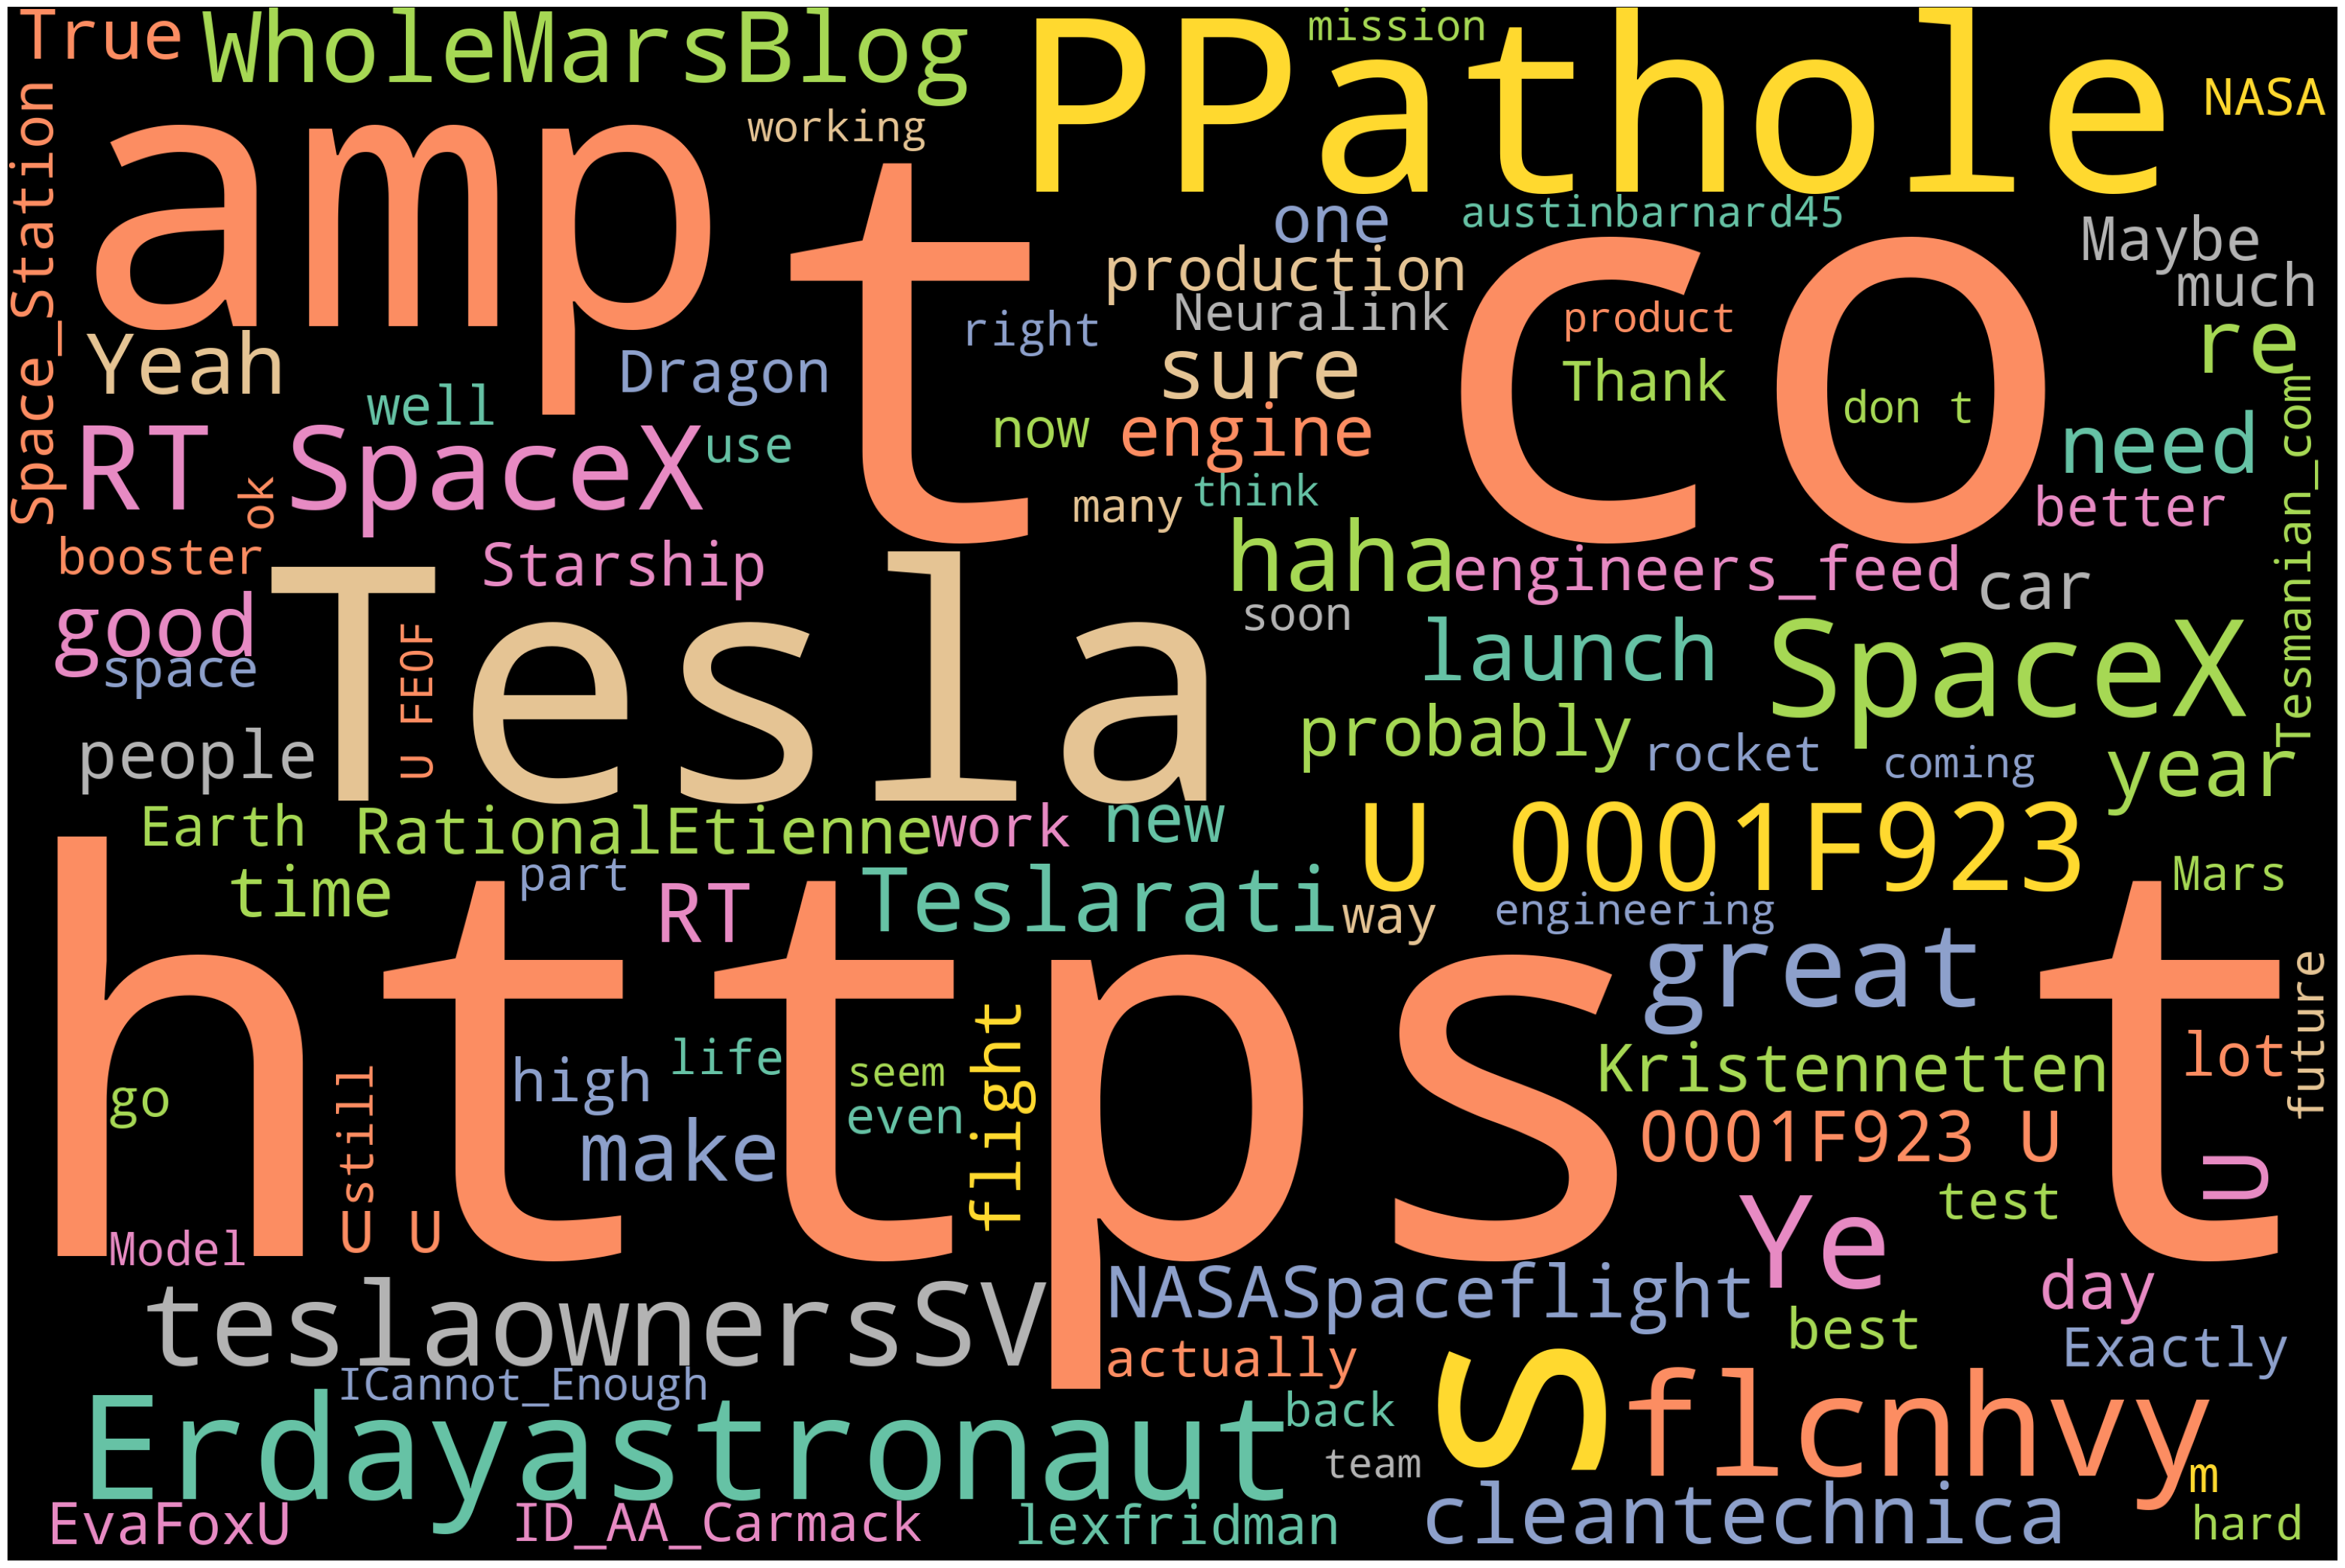

In [62]:
# Generate wordcloud
#string_Total = " ".join(df["df1"])

stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width =3000, height =2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(df1)
# Plot
plot_cloud(wordcloud)


In [63]:
#save wordcloud
wordcloud.to_file("wordcloud.png")


In [65]:
#NER(name entity recongniton)
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import string
import spacy
from matplotlib.pyplot import imread
from wordcloud import WordCloud
dff = pd.read_csv('Afinn.csv', error_bad_lines=False,sep = ",",encoding = 'latin-1')
dff

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [66]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import string
import spacy
from matplotlib.pyplot import imread
from wordcloud import wordcloud

In [67]:
musk2 = pd.read_csv('Elon_musk.csv', encoding='latin', error_bad_lines = False)
musk2

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [68]:
musk2 = musk2['Text']
musk2

0                                  @kunalb11 Im an alien
1       @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2                     @joerogan @Spotify Great interview!
3                         @gtera27 Doge is underestimated
4       @teslacn Congratulations Tesla China for amazi...
                              ...                        
1994    @flcnhvy True, it sounds so surreal, but the n...
1995    @PPathole Make sure to read ur terms &amp; con...
1996                  @TeslaGong @PPathole Samwise Gamgee
1997    @PPathole Altho Dumb and Dumber is <U+0001F525...
1998                            Progress update August 28
Name: Text, Length: 1999, dtype: object

In [69]:
musk2 = [x.strip() for x in musk2] # remove both the leading and the trailing characters
musk2 = [x for x in musk2 if x] # removes empty strings, because they are considered in Python as False
musk2[0:10]


['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [70]:
nlp=spacy.load('en_core_web_sm')


In [71]:
one_block = musk2[1]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [72]:
one_block

'@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?'

In [73]:
for token in doc_block[:]:
    print(token, token.pos_)
    

@ID_AA_Carmack ADV
Ray PROPN
tracing VERB
on ADP
Cyberpunk PROPN
with ADP
HDR PROPN
is AUX
next ADJ
- PUNCT
level NOUN
. PUNCT
Have AUX
you PRON
tried VERB
it PRON
? PUNCT


In [74]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]


In [75]:
nouns_verbs

['tracing', 'level', 'tried']

In [76]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
X

<3x3 sparse matrix of type '<class 'numpy.int64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [77]:
X.toarray()


array([[0, 1, 0],
       [1, 0, 0],
       [0, 0, 1]])

In [79]:
cv.get_feature_names_out()


array(['level', 'tracing', 'tried'], dtype=object)

In [83]:
#pd.DataFrame(X.toarray(), columns = sorted(cv.vocabulary_))
# Or
temp_df = pd.DataFrame(X.toarray(), columns = cv.get_feature_names_out())
temp_df

,level,tracing,tried
0,0,1,0
1,1,0,0
2,0,0,1


,level,tracing,tried
0,0,1,0
1,1,0,0
2,0,0,1


In [84]:
#emotion mining
#Sentiment analysis
dff1 = pd.read_csv('Afinn.csv', error_bad_lines=False, sep = ",", encoding = 'latin-1')
dff1

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [85]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(musk2))
sentences

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [86]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df


,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
922,"@kenyanwalstreet Not actually a payout, just a..."
923,"It may never pay out, as the stock cant b ht..."
924,Details Aug 28.
925,AI symbiosis while u wait @vistacruiser7 @flcn...


In [87]:
affinity_scores = dff1.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [88]:
nlp = spacy.load('en_core_web_sm')


In [89]:
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        #print(sentence)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0) #return 0 if key not found
    return sent_score

In [90]:
# test that it works
calculate_sentiment(text = 'Amazing')

4

In [91]:
calculate_sentiment(text = 'wonderful session')



4

In [92]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)
sent_df


,sentence,sentiment_value
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0
1,Have you tried it?,0
2,@joerogan @Spotify Great interview!,3
3,@gtera27 Doge is underestimated @teslacn Congr...,3
4,Now on to the next for even more!!,0
...,...,...
922,"@kenyanwalstreet Not actually a payout, just a...",0
923,"It may never pay out, as the stock cant b ht...",-4
924,Details Aug 28.,0
925,AI symbiosis while u wait @vistacruiser7 @flcn...,-2


In [93]:
sent_df.iloc[4,0]


'Now on to the next for even more!!'

In [94]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df


,sentence,sentiment_value,word_count
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
2,@joerogan @Spotify Great interview!,3,4
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13
4,Now on to the next for even more!!,0,8
...,...,...,...
922,"@kenyanwalstreet Not actually a payout, just a...",0,11
923,"It may never pay out, as the stock cant b ht...",-4,31
924,Details Aug 28.,0,3
925,AI symbiosis while u wait @vistacruiser7 @flcn...,-2,47


In [95]:
sent_df.sort_values(by='sentiment_value').tail(10)



,sentence,sentiment_value,word_count
226,"@PPathole @karpathy For a second there, I thou...",11,69
161,@harsimranbansal @heydave7 It will most likely...,11,93
820,Might be able to https://t.co/FB7e5nOq2E @Pri...,11,72
186,"Also, w https://t.co/IYdKttVsqk @cleantechnic...",12,98
81,@teslaownersSV This is a good one @MrBeastYT I...,13,38
648,Its https://t.co/IxhyT6NuiC @Teslarati Tesla...,13,65
588,The open areas https://t.co/rabjKrtQlw @Sav...,14,138
105,@Erdayastronaut @SpaceX Was also thinking that...,16,94
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",16,231
722,We just havent observed the https://t.co/mez...,17,72


In [96]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()


count    927.000000
mean       1.348436
std        2.688761
min       -8.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       17.000000
Name: sentiment_value, dtype: float64

<Axes: xlabel='sentiment_value', ylabel='Density'>

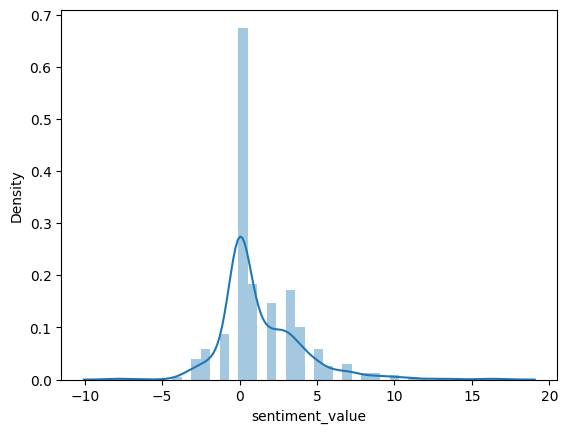

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])


<Axes: title={'center': 'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

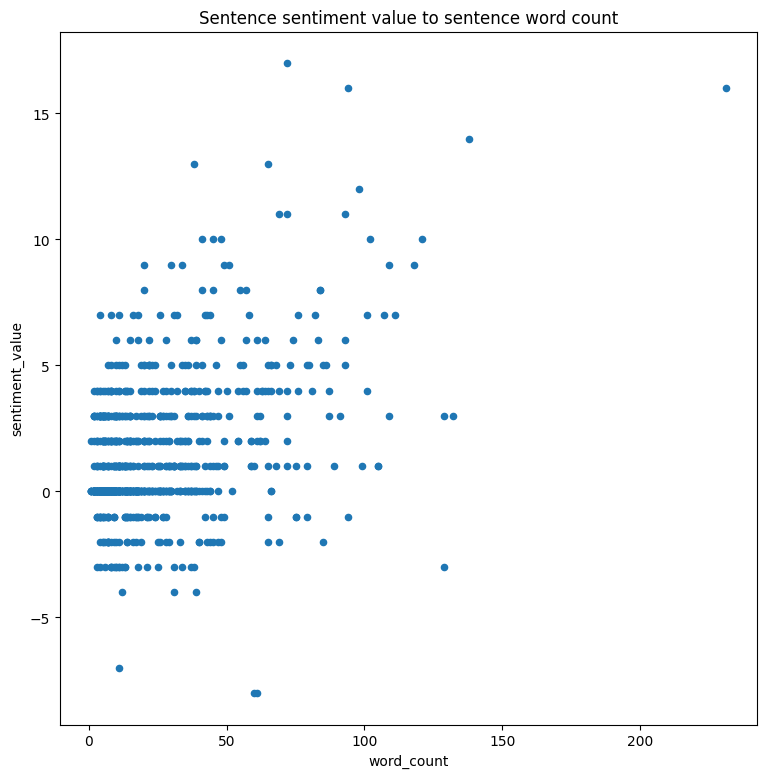

In [98]:
sent_df.plot.scatter(x='word_count',y='sentiment_value',figsize=(9,9),title='Sentence sentiment value to sentence word count')
